Anggota kelompok:
```
- Daffa Kaisha P.C.     - 00000055770
- Justine Donovan       - 00000063202
- Marsella Patricia     - 00000063226
- Reina Ratu Balqis     - 00000065099
```

<hr>

### Import Library


In [1]:
# Basic python
import pandas as pd
import numpy as np

# Statistics
from scipy import stats

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Ignore warning
import warnings
warnings.simplefilter('ignore')

<hr>

### Baca Data

Deskripsi dataset: <br>
Cars.com sekarang menjadi situs rahasia otomotif terbesar kedua dengan banyak koleksi kendaraan untuk dijual. Namun, situs webnya dapat diperpanjang, dan dalam upaya mengumpulkan banyak kendaraan Honda untuk membantu saya memilih antara mobil ekonomis, saya membuat pengikis web untuk mengumpulkan hingga 5.000 kendaraan Honda.

Sumber: https://www.kaggle.com/datasets/omartorres25/honda-data 

In [2]:
cars = pd.read_csv("honda_sell_data.csv")
print("The shape of the dataset: {} \n".format(cars.shape))
cars.head()

The shape of the dataset: (4999, 25) 



,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


Penelitian ini bertujuan untuk memprediksi harga mobil bekas, maka data yang digunakan adalah data mobil bekas.

In [3]:
# Memilih kondisi mobil bekas
used_cars = cars[cars['Condition'] == 'Used']
used_cars.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,"$12,499",4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,"$22,998",4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
602,2012,Honda,Civic LX,Used,"$14,988",4.5,0,–,–,Front-wheel Drive,...,CAR9912,45958,4.3,4.3,4.4,4.6,4.5,4.8,CA,Dealer
604,2021,Honda,Accord EX-L,Used,"$30,998",4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
606,2020,Honda,Accord Hybrid EX-L,Used,"$31,598",4.3,623,Platinum White Pearl,–,FWD,...,LA016988,17498,4.7,4.8,4.5,4.6,4.7,4.8,NV,Dealer


<hr>

### Data Understanding
Exploratory Data Analysis (EDA)

In [4]:
# LIhat informasi dari dataset
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2022 non-null   int64  
 1   Make                     2022 non-null   object 
 2   Model                    2022 non-null   object 
 3   Condition                2022 non-null   object 
 4   Price                    2022 non-null   object 
 5   Consumer_Rating          2022 non-null   float64
 6   Consumer_Review_#        2022 non-null   int64  
 7   Exterior_Color           2018 non-null   object 
 8   Interior_Color           2018 non-null   object 
 9   Drivetrain               2018 non-null   object 
 10  MPG                      1961 non-null   object 
 11  Fuel_Type                2018 non-null   object 
 12  Transmission             2018 non-null   object 
 13  Engine                   2018 non-null   object 
 14  VIN                   

Dataset terdiri atas 25 kolom dan 2022 baris.

In [5]:
# Check missing values
used_cars.isnull().sum()

Year                        0
Make                        0
Model                       0
Condition                   0
Price                       0
Consumer_Rating             0
Consumer_Review_#           0
Exterior_Color              4
Interior_Color              4
Drivetrain                  4
MPG                        61
Fuel_Type                   4
Transmission                4
Engine                      4
VIN                         4
Stock_#                     4
Mileage                     4
Comfort_Rating             26
Interior_Design_Rating     26
Performance_Rating         26
Value_For_Money_Rating     26
Exterior_Styling_Rating    26
Reliability_Rating         26
State                      66
Seller_Type                66
dtype: int64

Dataset terdapat missing values, missing values akan di handle dengan cara di hilangkan.

---



In [6]:
# Before removing the missing values, we will check what values are contained on each columns on the dataset
# See all uninque values on the column
columns = ['Year', 'Make', 'Model', 'Condition', 'Price', 'Consumer_Rating',
       'Consumer_Review_#', 'Exterior_Color', 'Interior_Color', 'Drivetrain',
       'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'VIN', 'Stock_#',
       'Mileage', 'Comfort_Rating', 'Interior_Design_Rating',
       'Performance_Rating', 'Value_For_Money_Rating',
       'Exterior_Styling_Rating', 'Reliability_Rating', 'State',
       'Seller_Type']
for i in columns:
  print(f"Unique values in column {i}: {used_cars[i].unique()}\n")
  print()

Unique values in column Year: [2017 2016 2012 2021 2020 2014 2023 2019 2018 2022 2011 2000 2009 2004
 2015 2007 1997 2013 2010 2008 2005 1981 2006 2002 1989 1987 2003 1991
 1992 2001 1998 1999 1993]


Unique values in column Make: ['Honda']


Unique values in column Model: ['Accord LX' 'Accord EX' 'Civic LX' 'Accord EX-L' 'Accord Hybrid EX-L'
 'CR-V EX' 'Accord LX 1.5T' 'Accord Sport 1.5T' 'CR-V EX-L'
 'Passport Sport' 'Civic Type R Touring' 'Civic EX' 'Insight Touring'
 'Civic Si Base' 'Pilot EX-L w/ Navigation' 'Civic Sport' 'Passport EX-L'
 'HR-V Touring' 'Pilot Special Edition' 'HR-V Sport' 'CR-V Hybrid EX-L'
 'Pilot Touring 7-Passenger' 'S2000 Base' 'Pilot Elite' 'Pilot Touring'
 'Ridgeline RTL-E' 'Accord Sport' 'Ridgeline RTL-T' 'Accord Sport 2.0T'
 'HR-V EX' 'Clarity Plug-In Hybrid Base' 'Pilot Black Edition'
 'Insight EX' 'Element LX' 'Odyssey Elite' 'Pilot EX-L' 'HR-V EX-L'
 'Odyssey Touring' 'S2000' 'Odyssey SE' 'Ridgeline Sport' 'HR-V LX'
 'Odyssey EX-L' 'Civic Sport Touring

In [7]:
# Replace values "-" to None on column 'Exterior_Color', 'Interior_Color', 'Drivetrain'
col = ['Exterior_Color', 'Interior_Color', 'Drivetrain']
for i in col:
  used_cars[i].replace('–', None, inplace=True)

used_cars.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,"$12,499",4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,"$22,998",4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
602,2012,Honda,Civic LX,Used,"$14,988",4.5,0,None,None,Front-wheel Drive,...,CAR9912,45958,4.3,4.3,4.4,4.6,4.5,4.8,CA,Dealer
604,2021,Honda,Accord EX-L,Used,"$30,998",4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
606,2020,Honda,Accord Hybrid EX-L,Used,"$31,598",4.3,623,Platinum White Pearl,None,FWD,...,LA016988,17498,4.7,4.8,4.5,4.6,4.7,4.8,NV,Dealer


In [8]:
# Drop baris yang memiliki null values
used_cars = used_cars.dropna(axis=0)
print(used_cars.info())
print()
print(used_cars.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1542 non-null   int64  
 1   Make                     1542 non-null   object 
 2   Model                    1542 non-null   object 
 3   Condition                1542 non-null   object 
 4   Price                    1542 non-null   object 
 5   Consumer_Rating          1542 non-null   float64
 6   Consumer_Review_#        1542 non-null   int64  
 7   Exterior_Color           1542 non-null   object 
 8   Interior_Color           1542 non-null   object 
 9   Drivetrain               1542 non-null   object 
 10  MPG                      1542 non-null   object 
 11  Fuel_Type                1542 non-null   object 
 12  Transmission             1542 non-null   object 
 13  Engine                   1542 non-null   object 
 14  VIN                   

Setelah missing values dibersihkan, dataset terdiri atas 1542 baris and 25 kolom.

Jika diperhatikan, pada kolom price, data harga yang digunakan masih dalam USD. Maka, kami akan melakukan konversi mata uang USD ke IDR

Selain itu, kami akan mengganti tipe data kolom Mileage menjadi integer.

In [9]:
# Convert Price column
# Define a function to convert USD to IDR
def usd_to_idr(amount_usd):
    exchange_rate = 14879  # exchange rate USD/IDR per 26 April 2023
    amount_idr = int(amount_usd.replace(',', '').strip('$')) * exchange_rate
    return amount_idr

# Apply the conversion function
used_cars['Price'] = used_cars['Price'].apply(usd_to_idr)

# Convert Mileage column to integer
used_cars['Mileage'] = used_cars['Mileage'].astype(int)

used_cars.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,185972621,4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,342187242,4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
604,2021,Honda,Accord EX-L,Used,461219242,4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
607,2014,Honda,CR-V EX,Used,252913242,4.5,7,Brown,Black,All-wheel Drive,...,23434682,105979,4.5,4.5,4.5,4.5,4.6,4.7,NV,Dealer
609,2020,Honda,Accord LX 1.5T,Used,350311176,4.3,3504,Silver,Black,Front-wheel Drive,...,181965A,32910,4.8,4.8,4.8,4.8,4.9,4.9,AZ,Dealer


In [10]:
# Check the basic statistics on the dataset
# Numeric data type
print("Basic statistics for numeric data types:\n{}\n".format(used_cars.describe()))

# Categorical data type
print("Basic statistics for categorical data types:\n{}".format(used_cars.describe(exclude=np.number)))

Basic statistics for numeric data types:
              Year         Price  Consumer_Rating  Consumer_Review_#  \
count  1542.000000  1.542000e+03      1542.000000        1542.000000   
mean   2017.957847  3.921385e+08         4.566213         924.003891   
std       4.149874  1.327900e+08         0.480948        2037.365763   
min    1992.000000  2.968360e+07         1.300000           0.000000   
25%    2017.000000  3.032638e+08         4.400000          35.250000   
50%    2019.000000  4.013908e+08         4.700000         263.000000   
75%    2021.000000  4.868967e+08         4.900000        1063.000000   
max    2023.000000  1.041232e+09         5.000000       29258.000000   

             Mileage  Comfort_Rating  Interior_Design_Rating  \
count    1542.000000     1542.000000             1542.000000   
mean    53108.441634        4.716278                4.676200   
std     41339.104657        0.217325                0.227158   
min       566.000000        3.800000                3.

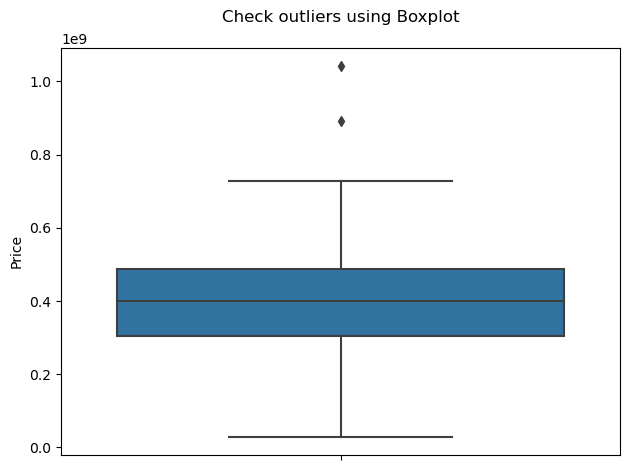

In [11]:
# Check outliers using boxplot on Price column
sns.boxplot(y=used_cars['Price'])
plt.title("Check outliers using Boxplot\n")
plt.tight_layout()
plt.show()

As we can see, there are 2 outliers on the Price column. We need to remove it.

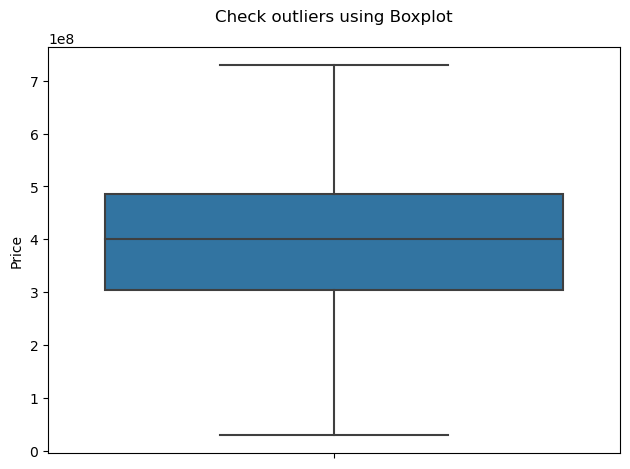

In [12]:
# Remove outliers using z-score
z_scores = stats.zscore(used_cars['Price'])

# Remove outliers from the dataset
used_cars = used_cars[(z_scores <= 3) & (z_scores >= -3)]

# Create the boxplot to check if the outliers are already handled
sns.boxplot(y=used_cars['Price'])
plt.title("Check outliers using Boxplot\n")
plt.tight_layout()
plt.show()

Outliers already handled

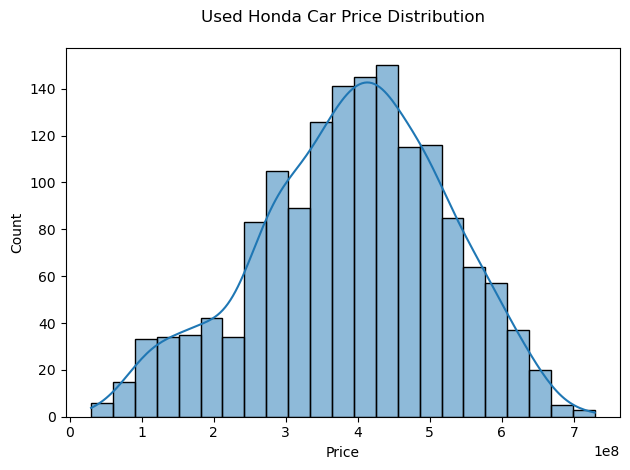

In [13]:
# Visualize the price distribution
sns.histplot(used_cars['Price'], kde=True)
plt.title("Used Honda Car Price Distribution\n")
plt.tight_layout()
plt.show()

In [14]:
# Recheck the information of the dataset
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1540 non-null   int64  
 1   Make                     1540 non-null   object 
 2   Model                    1540 non-null   object 
 3   Condition                1540 non-null   object 
 4   Price                    1540 non-null   int64  
 5   Consumer_Rating          1540 non-null   float64
 6   Consumer_Review_#        1540 non-null   int64  
 7   Exterior_Color           1540 non-null   object 
 8   Interior_Color           1540 non-null   object 
 9   Drivetrain               1540 non-null   object 
 10  MPG                      1540 non-null   object 
 11  Fuel_Type                1540 non-null   object 
 12  Transmission             1540 non-null   object 
 13  Engine                   1540 non-null   object 
 14  VIN                   

The data now contain 1540 rows and 25 columns, with no outliers and no null values. <br>
<hr>




### Data Preparation

#### Choosing the metrics for model building later

In [15]:
# Make a copy of used_cars dataset
used = used_cars.copy()
used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1540 non-null   int64  
 1   Make                     1540 non-null   object 
 2   Model                    1540 non-null   object 
 3   Condition                1540 non-null   object 
 4   Price                    1540 non-null   int64  
 5   Consumer_Rating          1540 non-null   float64
 6   Consumer_Review_#        1540 non-null   int64  
 7   Exterior_Color           1540 non-null   object 
 8   Interior_Color           1540 non-null   object 
 9   Drivetrain               1540 non-null   object 
 10  MPG                      1540 non-null   object 
 11  Fuel_Type                1540 non-null   object 
 12  Transmission             1540 non-null   object 
 13  Engine                   1540 non-null   object 
 14  VIN                   

In [16]:
# Selecting column
used = used[['Year', 'Make', 'Model', 'Condition', 'Price', 'Consumer_Rating',
       'Consumer_Review_#', 'Exterior_Color', 'Interior_Color', 'Drivetrain',
       'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'VIN', 'Stock_#',
       'Mileage', 'Comfort_Rating', 'Interior_Design_Rating',
       'Performance_Rating', 'Value_For_Money_Rating',
       'Exterior_Styling_Rating', 'Reliability_Rating', 'State',
       'Seller_Type']]
used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1540 non-null   int64  
 1   Make                     1540 non-null   object 
 2   Model                    1540 non-null   object 
 3   Condition                1540 non-null   object 
 4   Price                    1540 non-null   int64  
 5   Consumer_Rating          1540 non-null   float64
 6   Consumer_Review_#        1540 non-null   int64  
 7   Exterior_Color           1540 non-null   object 
 8   Interior_Color           1540 non-null   object 
 9   Drivetrain               1540 non-null   object 
 10  MPG                      1540 non-null   object 
 11  Fuel_Type                1540 non-null   object 
 12  Transmission             1540 non-null   object 
 13  Engine                   1540 non-null   object 
 14  VIN                   

#### Encoding categorical values

In [17]:
# Initialize LabelEncoder
le = LabelEncoder()

# Select column wiht categorical values
cols = ['Model', 'Make', 'Condition', 'Seller_Type', 'Drivetrain', 'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'State', 'VIN', 'Stock_#', 'Interior_Color', 'Exterior_Color']
for i in cols:
    used[i] = le.fit_transform(used[i]) + 1

# Check the data
used.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,1,13,1,185972621,4.5,188,104,30,5,...,195,86667,4.8,4.8,4.8,4.8,4.8,4.9,8,1
514,2016,1,3,1,342187242,4.7,0,15,15,5,...,358,53233,4.8,4.7,4.7,4.7,4.8,4.8,43,1
604,2021,1,5,1,461219242,4.8,2,86,15,5,...,339,19130,4.9,4.8,4.8,4.8,4.9,4.8,5,1
607,2014,1,26,1,252913242,4.5,7,19,5,2,...,302,105979,4.5,4.5,4.5,4.5,4.6,4.7,33,1
609,2020,1,14,1,350311176,4.3,3504,90,5,5,...,168,32910,4.8,4.8,4.8,4.8,4.9,4.9,4,1


#### Data Normalization Using Standard Scaler

In [18]:
# Initialize Standard Scaler
ss = StandardScaler()

# Standardize
standard = ss.fit_transform(used)

# Save the standardize result to dataframe
used = pd.DataFrame(standard, columns=used.columns)

# See the data
used.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,-0.229867,0.0,-1.493501,0.0,-1.565899,-0.138024,-0.361710,1.411792,3.186174,0.727248,...,-1.294540,0.810725,0.387240,0.545633,0.666438,0.844729,0.500926,0.822499,-1.141393,0.0
1,-0.470844,0.0,-1.782195,0.0,-0.375093,0.277939,-0.453967,-1.398668,0.851721,0.727248,...,-0.927885,0.001413,0.387240,0.105468,0.237914,0.404945,0.500926,0.270101,1.289598,0.0
2,0.734041,0.0,-1.724456,0.0,0.532274,0.485920,-0.452985,0.843384,0.851721,0.727248,...,-0.970623,-0.824094,0.847742,0.545633,0.666438,0.844729,1.111231,0.270101,-1.349764,0.0
3,-0.952799,0.0,-1.118200,0.0,-1.055618,-0.138024,-0.450532,-1.272356,-0.704580,-1.414171,...,-1.053852,1.278196,-0.994266,-0.774862,-0.619133,-0.474625,-0.719684,-0.282297,0.595029,0.0
4,0.493064,0.0,-1.464632,0.0,-0.313165,-0.553987,1.265534,0.969697,-0.704580,0.727248,...,-1.355274,-0.490531,0.387240,0.545633,0.666438,0.844729,1.111231,0.822499,-1.419220,0.0


#### Feature selection (Choosing X and y)

#### Correlation

In [19]:
correlation = used.corr()

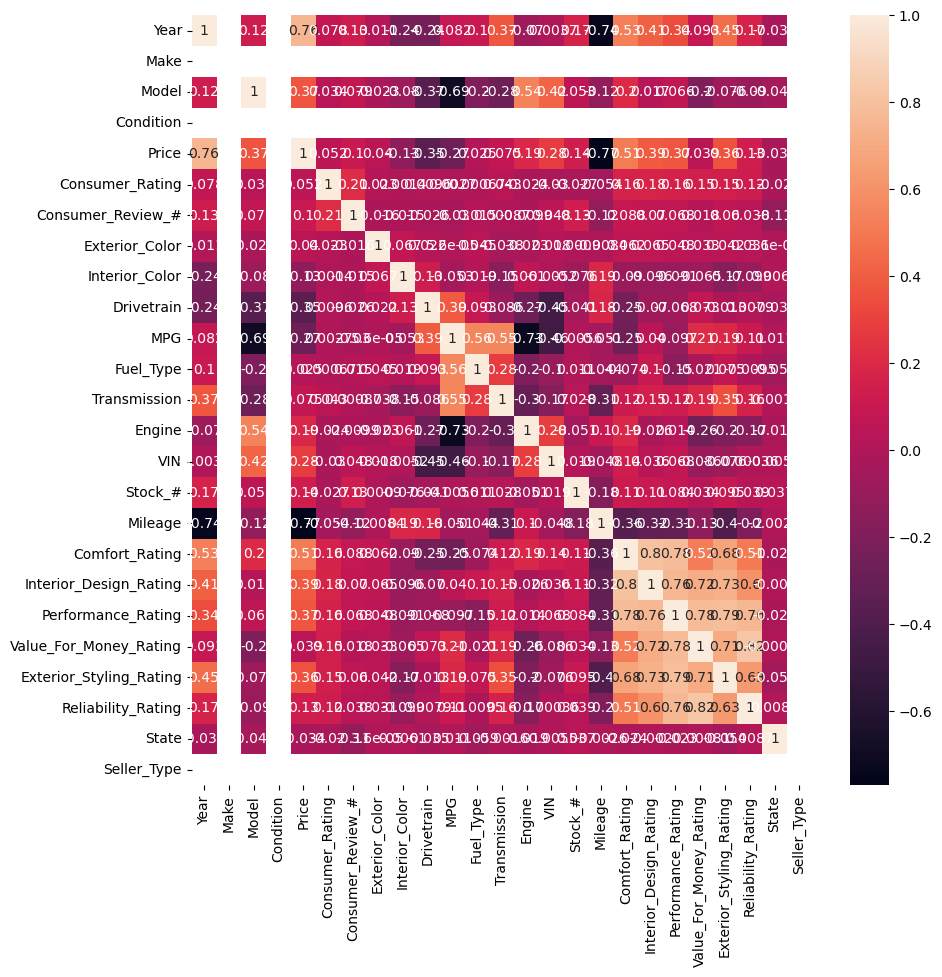

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

#### Feature Importance

In [21]:
# Choosing X and y
X = used.drop(columns='Price')
y = used['Price']

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32) #sejauh ini random_state=32 yang ngasih performa paling bagus di random forest

### Modeling

#### Feature Importance

In [23]:
# Random forest regressor untuk memilih feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

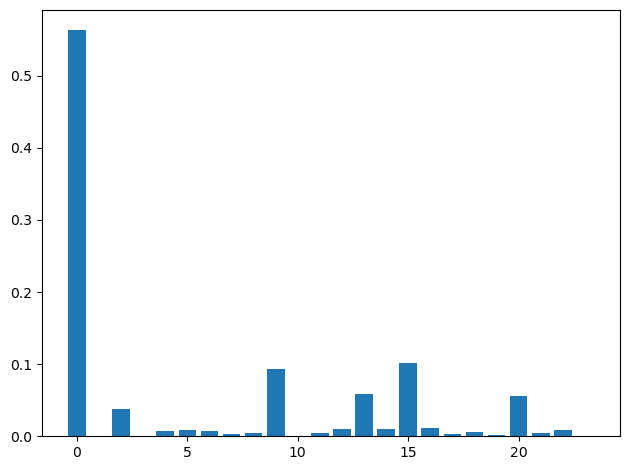

In [24]:
rf_fi = rf.feature_importances_
# Menampilkan plot feature importance
plt.bar([x for x in range(len(rf_fi))], rf_fi)
plt.tight_layout()
plt.show()

In [25]:
# Memilih feature yang digunakan berdasarkan korelasi dan feature importance
used_feature = used[['Year', 'Model', 'MPG', 'VIN', 'Mileage', 'Transmission', 'Price']]
used_feature

,Year,Model,MPG,VIN,Mileage,Transmission,Price
0,-0.229867,-1.493501,0.561693,-1.380017,0.810725,0.806009,-1.565899
1,-0.470844,-1.782195,0.594585,-1.328281,0.001413,0.806009,-0.375093
2,0.734041,-1.724456,1.022187,-1.101090,-0.824094,0.806009,0.532274
3,-0.952799,-1.118200,-0.260620,-0.552232,1.278196,-1.355512,-1.055618
4,0.493064,-1.464632,1.022187,-1.238304,-0.490531,0.806009,-0.313165
...,...,...,...,...,...,...,...
1535,0.252087,0.787177,-0.984254,0.790670,-0.688369,0.085502,0.300555
1536,0.011110,-1.349155,0.824833,-1.200064,0.279446,0.806009,-0.715242
1537,0.493064,0.152051,1.548467,-0.329540,-0.297075,0.806009,-0.999248
1538,0.011110,-0.280989,0.923510,1.625204,0.719685,-0.454878,-0.771839


#### Linear Regression

In [26]:
X = used_feature.drop(columns='Price')
y = used_feature['Price']

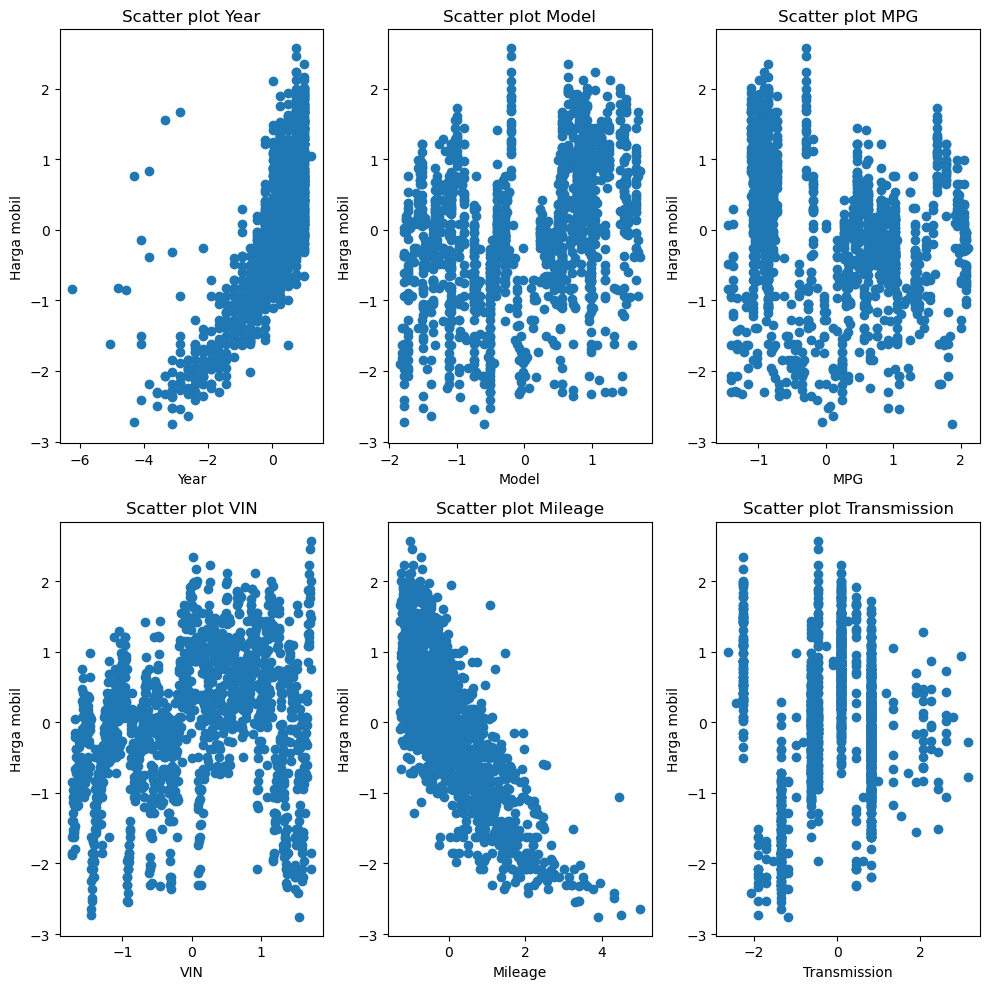

In [27]:
# Lihatscatterplot antara independen variabel dengan dependen variabel (price)

col = X.columns

# Mengatur ukuran dan layout subplot
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

# Loop untuk membuat scatter plot
for i, prediktor in enumerate(col):
    ax = axes[i]
    ax.scatter(X[prediktor], y)
    ax.set_xlabel(prediktor)
    ax.set_ylabel('Harga mobil')
    ax.set_title(f'Scatter plot {prediktor}')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Membagi data train dengan test (80:20)

In [29]:
# Ambil 10 data pertama dari test set untuk tahap deployment nanti
X_deploy = X_test[:10].values
y_deploy = y_test[:10].values

In [30]:
# LinearRegression
import joblib

lr = LinearRegression()
lr.fit(X_train, y_train)

# Menyimpan model
joblib.dump(lr, "regresi_linear.pkl")

print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

Coefficients:  [ 0.45934055  0.04699581 -0.16756883  0.15109693 -0.45102047 -0.11251587]
Intercept:  -0.00027978648546721045


In [31]:
# Lihat akurasi train dan test set
print("Linear regression Train set accuracy: {}".format(np.round(lr.score(X_train, y_train), 3)))
print("Linear regression Test set accuracy: {}".format(np.round(lr.score(X_test, y_test), 3)))

# Cross-val score
print("Linear regression Train cross-validation score on training set: {}".format(np.round(cross_val_score(lr, X_train, y_train), 3)))
print("Linear regression Train cross-validation score on testing set: {}".format(np.round(cross_val_score(lr, X_test, y_test), 3)))

Linear regression Train set accuracy: 0.792
Linear regression Test set accuracy: 0.817
Linear regression Train cross-validation score on training set: [0.769 0.76  0.782 0.8   0.826]
Linear regression Train cross-validation score on testing set: [0.804 0.855 0.867 0.819 0.577]


Skor cross_validation pada training set dan testing set memiliki performa yang serupa, yang menunjukkan bahwa model regresi linear mungkin cukup baik dalam memodelkan hubungan antara variabel independen dan dependen.

In [32]:
# Make prediction
y_pred = lr.predict(X_test)

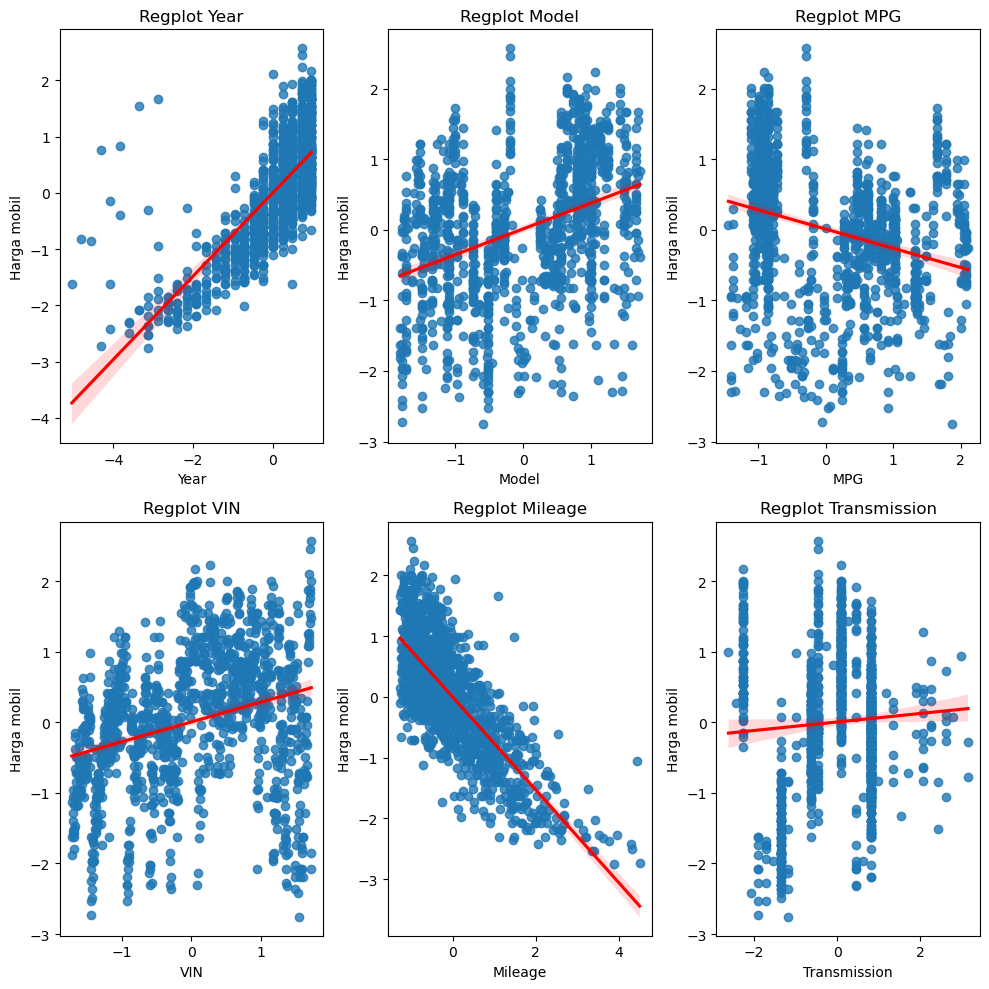

In [33]:
# Visualisasi data latih
# Mengatur ukuran dan layout subplot
col = X_train.columns

fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

# Loop untuk membuat regplot
for i, prediktor in enumerate(col):
    ax = axes[i]
    sns.regplot(x=X_train[prediktor], y=y_train, line_kws={"color": "red"}, ax=ax)
    ax.set_xlabel(prediktor)
    ax.set_ylabel('Harga mobil')
    ax.set_title(f'Regplot {prediktor}')

# Menampilkan plot
plt.tight_layout()
plt.show()

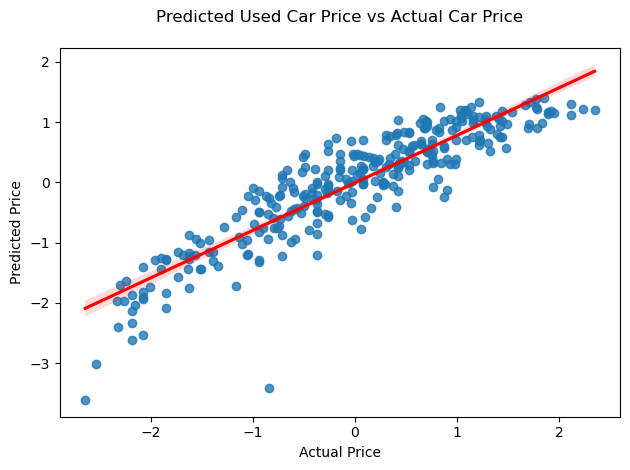

In [34]:
# Visualisasi harga prediksi dengan harga sebernarnya
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'})
plt.title("Predicted Used Car Price vs Actual Car Price\n")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

### Evaluation

In [35]:
# Initialize Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred)

# Initialize R-squared 
r2_lr = r2_score(y_test, y_pred)

print('Mean Squared Error linear regression: {:.3f}'.format(mse_lr))
print()
print('R-squared linear regression: {:.3f}%'.format(r2_lr*100))

Mean Squared Error linear regression: 0.215

R-squared linear regression: 81.690%


-----
### Deployment

In [36]:
# Membuat data "baru" dengan cara memilih top 10 data dari X_test
# new data('Year', 'Model', 'MPG', 'VIN', 'Mileage', 'Transmission')
new_data = X_deploy
new_data

array([[ 0.97501853,  0.90265449, -0.98425433,  0.87164913, -0.84757395,
         0.08550171],
       [-0.47084429,  0.70056906, -0.85268437, -0.28455126,  0.63919931,
        -0.63500516],
       [ 0.25208712,  0.44074494,  2.07474712, -1.53522718,  0.89997345,
         0.80600858],
       [ 0.25208712,  0.55622233, -0.85268437, -0.12934148, -0.21915499,
         0.08550171],
       [ 0.25208712,  0.64283037, -0.85268437,  0.06185897, -0.32997129,
        -2.25614563],
       [ 0.73404139, -1.52237063,  1.77871472, -0.97062348, -0.72017635,
         0.80600858],
       [ 0.49306426,  0.81604645, -0.98425433,  0.64895684, -0.25553702,
         0.08550171],
       [ 1.21599567, -1.08933043,  0.46301517,  1.24055353, -1.22465921,
         1.34638874],
       [ 0.25208712,  0.84491579, -0.78689939,  0.58147432, -0.07147255,
         0.08550171],
       [ 0.97501853,  1.2202173 , -0.72111442,  0.24406176, -1.07586327,
         0.08550171]])

In [37]:
# Memuat model dari file
model = joblib.load('regresi_linear.pkl')

In [38]:
# Prediksi data "baru"
predict = model.predict(new_data)

In [39]:
print(f"Predicted: {predict}")

Predicted: [ 1.15929349 -0.30058917 -0.93999905  0.35421748  0.70063041  0.0547603
  0.63317324  1.01779556  0.39755563  1.1382602 ]
